## Transformación Gaussiana con Scikit-learn

Scikit-learn tiene transformadores que también crean mapeos Gaussianos. Por ejemplo el PowerTransformer permite hacer la transformación Box-Cox y Yeo-Johnson. Con el FunctionTransformer, podemos especificar cualquier función deseada.

Los transformadores de por si, no permiten seleccionar columnas, pero podemos usar un tercer transformador, el ColumnTransformer, para lograrlo.

Otra cosa para tener en cuenta es que los transformadores de Scikit-learn retornan arreglos de NumPy, y no dataframes, por lo tanto debemos estar atentos con el orden de las columnas para no mezclar las variables.

## Importante

Las transformaciones Box-Cox y Yeo-Johnson necesitan aprender sus parámetros de los datos. Por lo tanto, como siempre, antes de intentar cualquier transformación, es importante dividir el conjunto de datos en segmentos de entrenamiento y prueba.

Para hacer el demo más sencillo, no lo haremos, pero cuando uses este tipo de transformaciones en tus pipelines  por favor asegúrate de dividir tus datos en entrenamiento y prueba.


## En este demo

Verás como implementar transformaciones para variables usando Scikit-learn y los datos del Boston House Price.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer, PowerTransformer

import warnings
warnings.filterwarnings("ignore")

In [3]:
# cargar los datos

data = pd.read_csv('../houseprice.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Seleccionemos las variables numéricas y positivas en el conjunto de datos para la demostración. La mayoría de las transformaciones requiren que las variables sean positivas

In [4]:
cols = []

for col in data.columns:

    if data[col].dtypes != 'O' and col != 'Id':  # si la variable es numérica
        
        if np.sum(np.where(data[col] <= 0, 1, 0)) == 0:  # si la variable es positiva
        
            cols.append(col)  # a

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

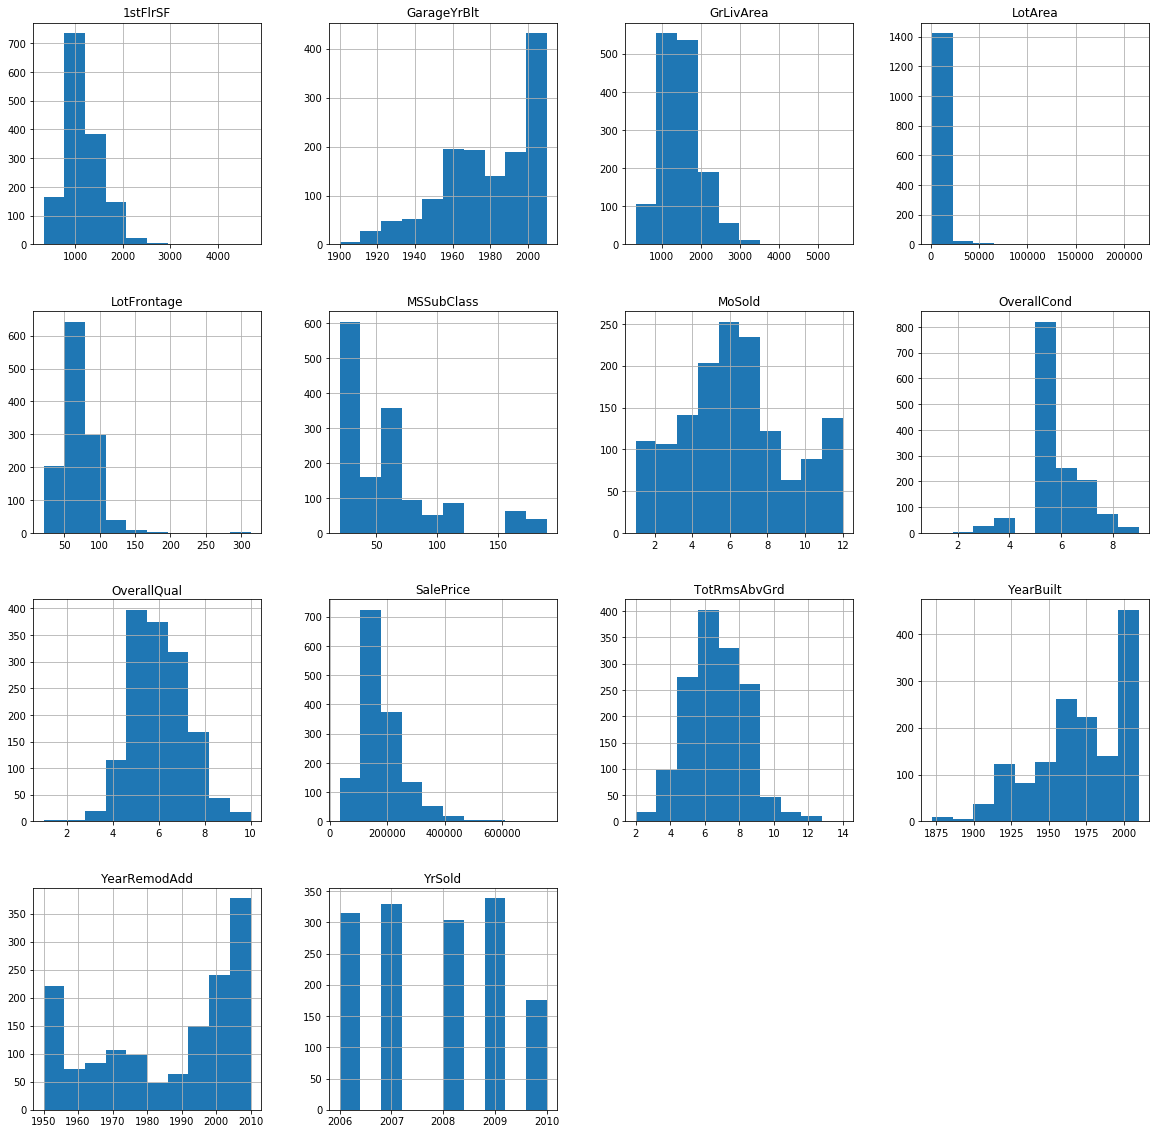

In [5]:
# exploremos las distribuciones de las variables numéricas

data[cols].hist(figsize=(20,20))
plt.show()

## Gráficas para evaluar normalidad

Para visualizar la distribución de las variables, usamos histográmas y gráficas Q-Q. En los gráficos Q-Q, si la variable está normalmente distribuida, los valores de la variable deberían estar sobre la línea de 45 grados graficados en contra de los cuantiles teóricos. Discutimos esto en detalle en la sección 3 del curso.

In [6]:
# graficar los histogramas para evaluar rápidamente
# la distribución de las variables

# histograma y gráficos Q-Q 

def diagnostic_plots(df, variable):
    
    # función para graficar un histograma y un gráfico Q-Q 
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Transformación Logarítmica


In [7]:
# Crea un transformador logarítmico. (log transformer)
transformer = FunctionTransformer(np.log, validate=True)

In [8]:
# transforma todas las variables numéricas y positivas
data_t = transformer.transform(data[cols].fillna(1))

In [9]:
# Scikit-learn retorna un arreglo NumPy, por lo tanto guarda 
# datos en un dataframe
# Scikit-learn devolverá un dataframe solo
# con las columnas como se indican en cols

data_t = pd.DataFrame(data_t, columns = cols)

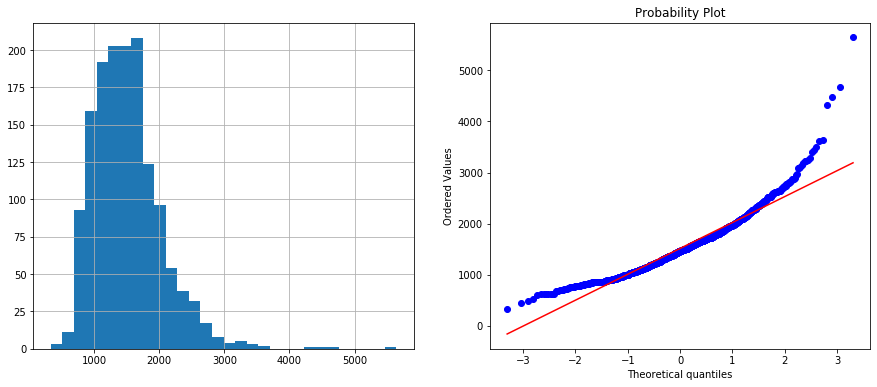

In [10]:
# distribución original

diagnostic_plots(data, 'GrLivArea')

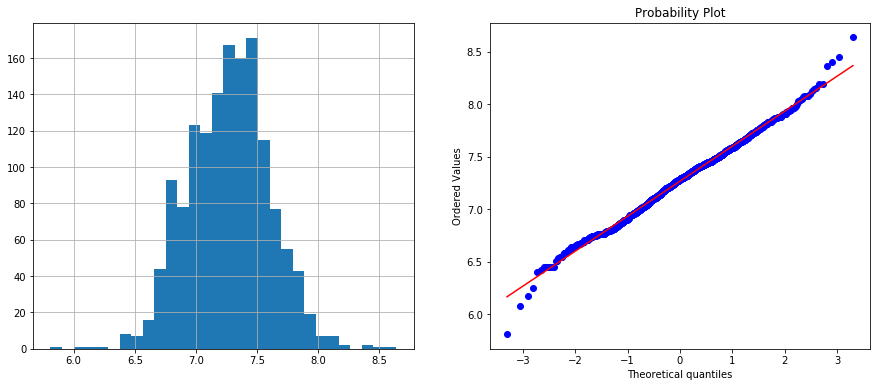

In [11]:
# distribución original
diagnostic_plots(data_t, 'GrLivArea')

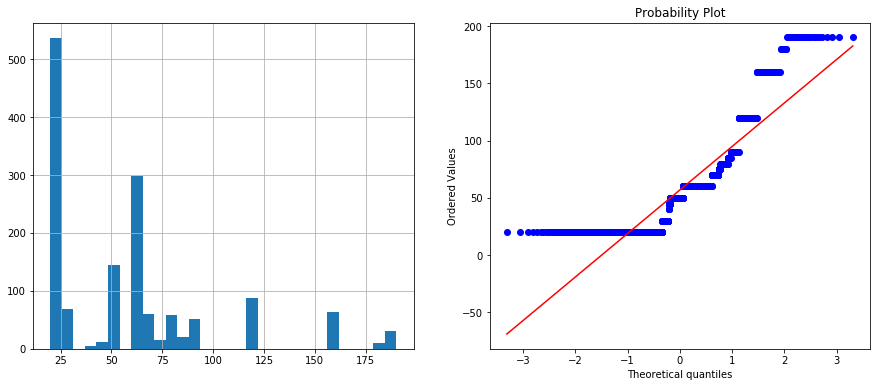

In [12]:
# distribución original
diagnostic_plots(data, 'MSSubClass')

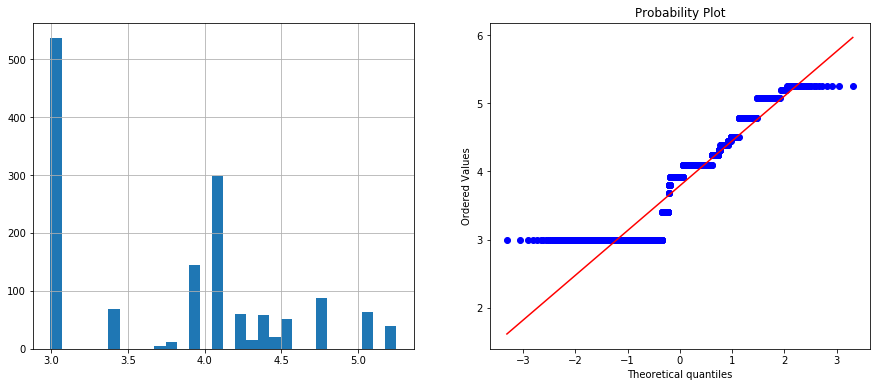

In [13]:
# distribución original

diagnostic_plots(data_t, 'MSSubClass')

### Transformación Recíproca

In [14]:
# crea el transformer
transformer = FunctionTransformer(lambda x: 1/x, validate=True)

# tambien
# transformer = FunctionTransformer(np.reciprocal, validate=True)

# transforma las variables positivas
data_t = transformer.transform(data[cols].fillna(1))

# re-capture en un dataframe
data_t = pd.DataFrame(data_t, columns = cols)

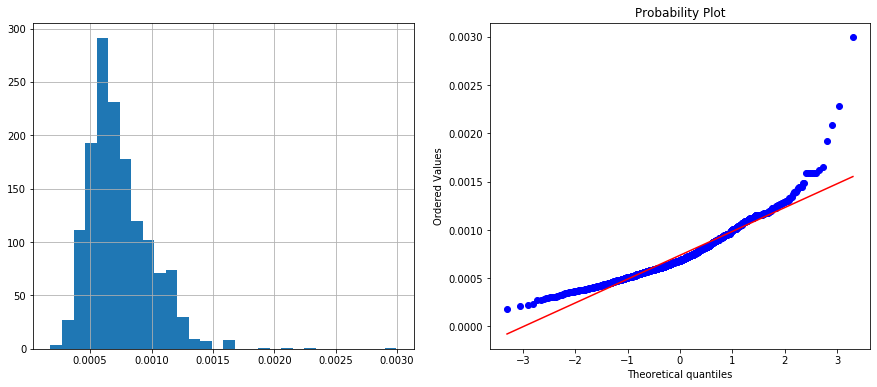

In [15]:
# variable transformada 
diagnostic_plots(data_t, 'GrLivArea')

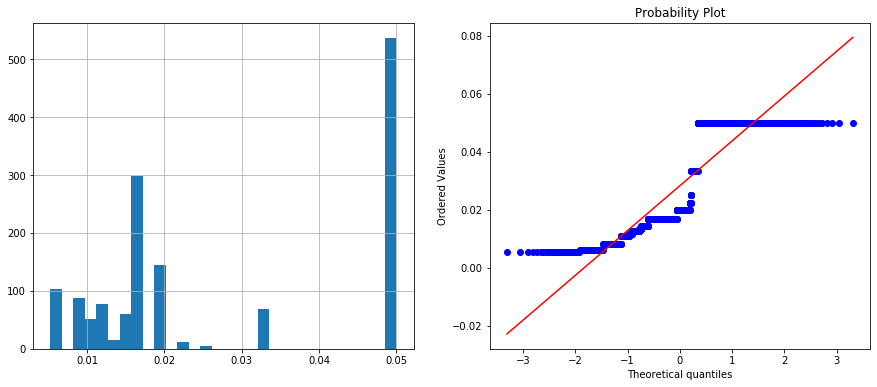

In [16]:
# variable transformada 
diagnostic_plots(data_t, 'MSSubClass')

### Transformación Raíz cuadrada

In [17]:
transformer = FunctionTransformer(lambda x: x**(1/2), validate=True)

# también
# transformer = FunctionTransformer(np.sqrt, validate=True)

data_t = transformer.transform(data[cols].fillna(1))

data_t = pd.DataFrame(data_t, columns = cols)

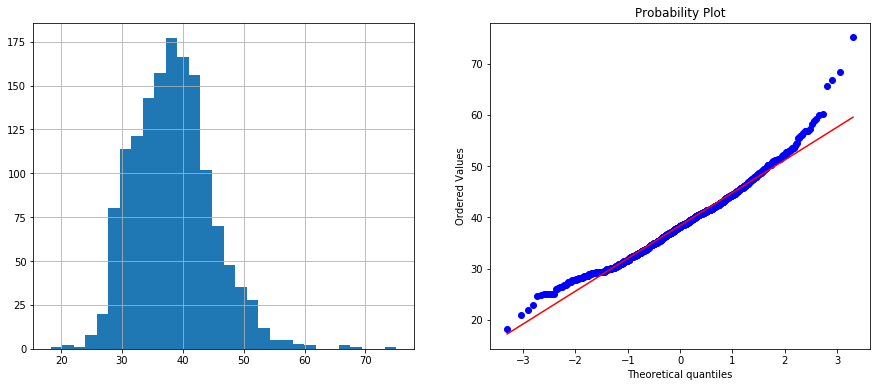

In [18]:
diagnostic_plots(data_t, 'GrLivArea')

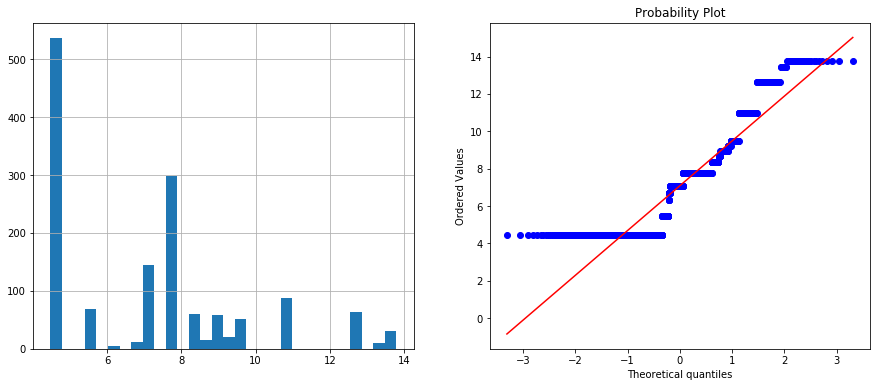

In [19]:
diagnostic_plots(data_t, 'MSSubClass')

### Transformación Exponencial

In [20]:
transformer = FunctionTransformer(lambda x: x**(1/1.2), validate=True)

data_t = transformer.transform(data[cols].fillna(1))

data_t = pd.DataFrame(data_t, columns = cols)

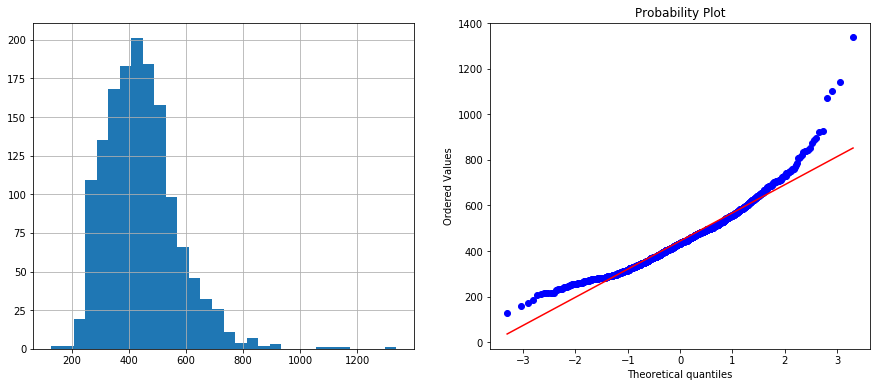

In [21]:
diagnostic_plots(data_t, 'GrLivArea')

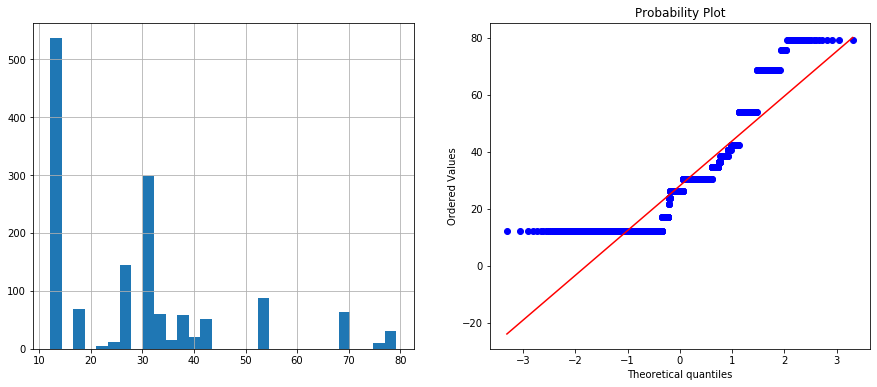

In [22]:
diagnostic_plots(data_t, 'MSSubClass')

### Transformación Box-Cox

In [23]:
# crea transformer
transformer = PowerTransformer(method='box-cox', standardize=False)

# encuentra lambda óptimo usando segmento de entrenamiento
transformer.fit(data[cols].fillna(1))

# transforma los datos
data_t = transformer.transform(data[cols].fillna(1))

# captura datos en un dataframe
data_t = pd.DataFrame(data_t, columns = cols)

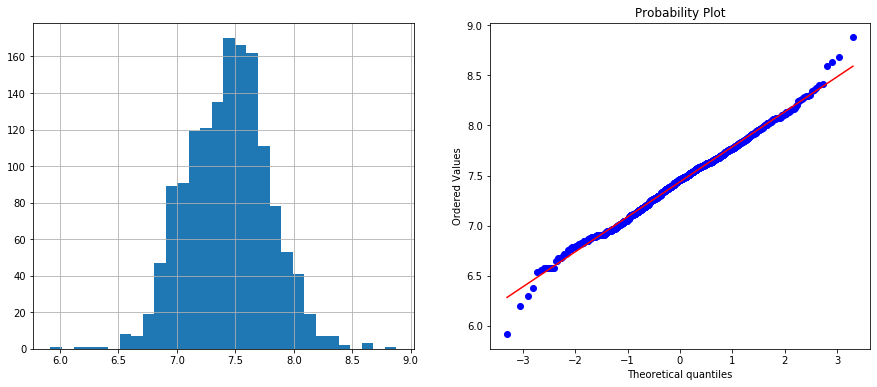

In [24]:
diagnostic_plots(data_t, 'GrLivArea')

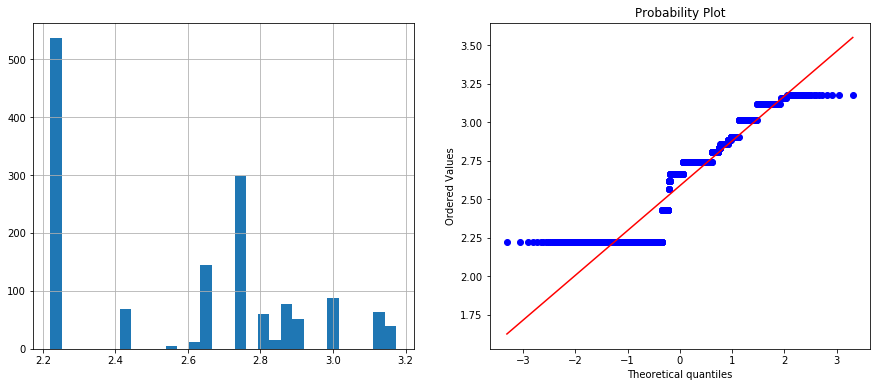

In [25]:
diagnostic_plots(data_t, 'MSSubClass')

### Yeo-Johnson

Yeo-Johnson es una adaptación de la transformación Box-Cox que puede también ser usada en variables con valores negativos. Expandamos la lista de variables para el demo, para incluir aquellas que contienen zeros y valores negativos también:

In [26]:
cols = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'SalePrice'
]

In [27]:
# llamar el transformer
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# aprender lambda en el segmento de entrenamiento
transformer.fit(data[cols].fillna(1))

# transformar los datos
data_t = transformer.transform(data[cols].fillna(1))

# capturar los datos en un dataframe
data_t = pd.DataFrame(data_t, columns = cols)

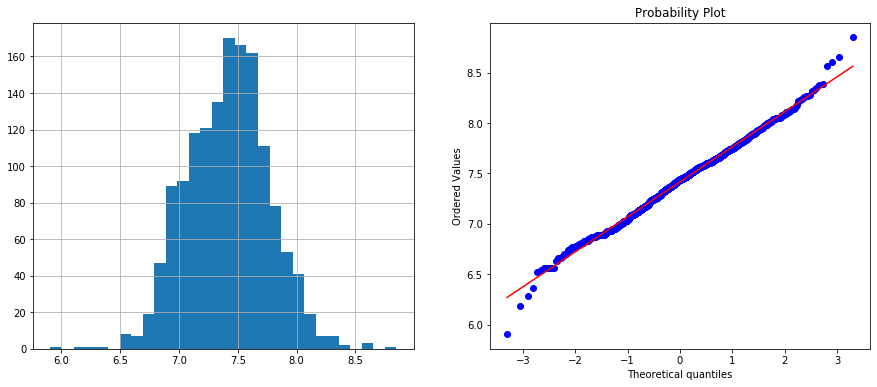

In [28]:
diagnostic_plots(data_t, 'GrLivArea')

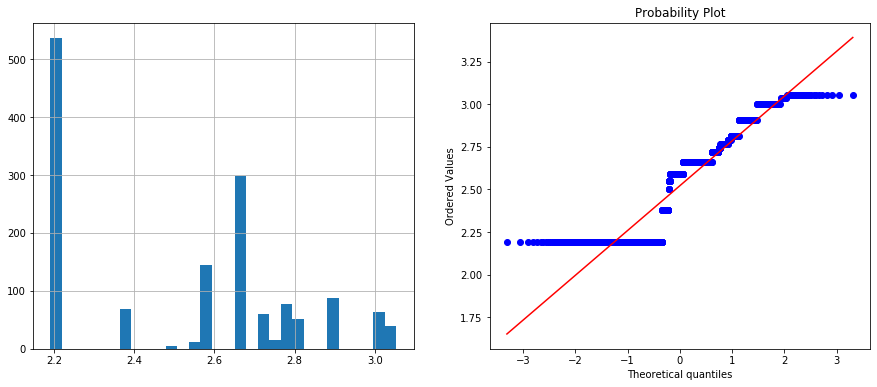

In [29]:
diagnostic_plots(data_t, 'MSSubClass')